In [1]:
%pylab inline
from classy import *

Populating the interactive namespace from numpy and matplotlib
Version  1.0.4
Version:  0.0.22


## make a fake image data set without square images

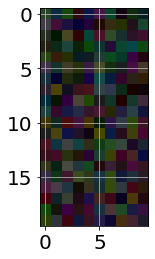

In [2]:
for i in range(100):
    im=rand(20,10,3)*0.3
    imsave('test images/cat/%d.jpg' % i,im)
imshow(im)

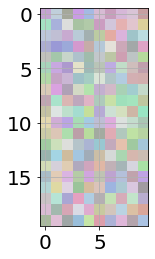

In [3]:
for i in range(100):
    im=rand(20,10,3)*0.3+.6
    imsave('test images/dog/%d.jpg' % i,im)
imshow(im)

In [4]:
images=image.load_images('test images/')

[cat]: 100 files found
[dog]: 100 files found


In [5]:
data=image.images_to_vectors(images,verbose=False)

In [6]:
data.vectors/=255

In [7]:
summary(data)

200 vectors of length 600
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p595', 'p596', 'p597', 'p598', 'p599'  (600 features)
Target values given.
Target names: 'cat', 'dog'
Mean:  [0.44676471 0.45215686 0.44754902 0.44088235 0.44731373 0.44323529
 0.44621569 0.454      0.44939216 0.4444902  0.45235294 0.44858824
 0.44129412 0.44972549 0.44627451 0.44601961 0.45319608 0.45033333
 0.44313725 0.44798039 0.44635294 0.44390196 0.4454902  0.44488235
 0.44166667 0.44115686 0.44056863 0.44501961 0.44182353 0.44145098
 0.45190196 0.45509804 0.45239216 0.45190196 0.45529412 0.45282353
 0.44994118 0.45435294 0.45209804 0.44031373 0.44494118 0.44331373
 0.44556863 0.45072549 0.45007843 0.44662745 0.45182353 0.45184314
 0.44509804 0.44921569 0.4494902  0.45088235 0.45345098 0.45435294
 0.44105882 0.44145098 0.44319608 0.44203922 0.44058824 0.44203922
 0.44535294 0.4427451  0.44137255 0.44752941 0.44554902 0.44415686
 0.44847059 0.4472549  0.4462549  0.4427451  0.44217647 0.44247059
 0.445

In [8]:
data_train,data_test=split(data,test_size=0.2)

Original vector shape:  (200, 600)
Train vector shape:  (160, 600)
Test vector shape:  (40, 600)


In [15]:
C=NumPyNetBackProp({
    'input':20*10*3,               # number of features
    'hidden':[(5,'logistic'),(7,'logistic'),],
    'output':(2,'logistic'),  # number of classes
    'cost':'mse',
})

In [16]:
C.fit(data_train.vectors,data_train.targets)
print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

  3%|▎         | 29/1000 [00:00<00:03, 286.23it/s]

layer       filters  size              input                output
   0 input                   160 x   1 x   1 x 600   ->   160 x   1 x   1 x 600
   1 connected               160 x   1 x   1 x 600   ->   160 x   5
   2 connected               160 x   1 x   1 x   5   ->   160 x   7
   3 connected               160 x   1 x   1 x   7   ->   160 x   2
   4 cost                    160 x   1 x   1 x   2   ->   160 x   1 x   1 x   2


100%|██████████| 1000/1000 [00:03<00:00, 333.14it/s]

On Training Set: 100.0
On Test Set: 87.5


In [17]:
C.weights[0],C.weights[0].shape

(array([[-0.34788986,  0.32841084,  0.47100236, -0.28875707,  0.41442179],
        [ 0.56155604, -0.50790879, -0.59006947,  0.44085377, -0.54695331],
        [-0.36416264,  0.3763282 ,  0.49145656, -0.24052265,  0.41654451],
        ...,
        [-0.05909156, -0.00592288, -0.06606978, -0.04238461,  0.03242934],
        [-0.17720184,  0.14270773,  0.26952997, -0.17670292,  0.20052048],
        [-0.44320104,  0.52423711,  0.58580532, -0.36097222,  0.49865006]]),
 (600, 5))

In [18]:
C.weights[1],C.weights[1].shape

(array([[-1.68631245,  1.29707918,  1.04456851,  1.40339804,  0.82550385,
         -1.0379413 , -0.72307334],
        [ 0.98286074, -1.21281227, -0.57403972, -1.05548397, -0.56410342,
          0.97087075,  0.57515278],
        [ 0.45284951, -0.486138  , -0.67912252, -1.36007712, -1.34176433,
          0.44161584,  1.40333582],
        [-1.13519979,  0.94003634,  0.81489494,  1.04304078,  0.83577919,
         -0.5599572 , -1.15683186],
        [ 0.17841141, -0.6870844 , -1.40571453, -0.99634358, -1.28551548,
          0.68133041,  0.71990031]]), (5, 7))

In [19]:
C.weights[2],C.weights[2].shape

(array([[-0.63169951,  1.20111168],
        [ 1.30845468, -0.78320793],
        [ 0.84594301, -1.25059606],
        [ 1.25602384, -0.44947912],
        [ 0.65431573, -1.24854173],
        [-1.05012097,  1.15874871],
        [-1.10421509,  1.00803654]]), (7, 2))

## visualize the weights from the inputs to the first hidden layer

In [21]:
W=C.weights[0]
W.shape

(600, 5)

In [23]:
vector=W[:,0]
vector.shape

(600,)

In [25]:
vector_image=vector.reshape(20,10,3)

In [29]:
vector_image=vector_image-vector_image.min()  # make the minimum zero
vector_image=vector_image/vector_image.max()  # scale the new maximum to 1

In [30]:
vector_image.min(),vector_image.max()

(0.0, 1.0)

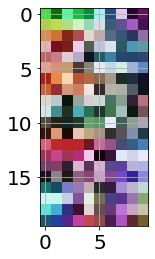

In [31]:
imshow(vector_image)

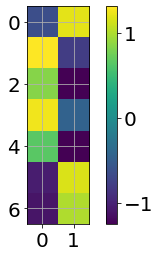

In [33]:
imshow(C.weights[2])
colorbar()